# PART 1 - Classification

In [ ]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc

In [ ]:
!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 361 (delta 133), reused 124 (delta 124), pack-reused 217
Receiving objects: 100% (361/361), 27.46 MiB | 6.16 MiB/s, done.
Resolving deltas: 100% (199/199), done.
Updating files: 100% (56/56), done.


In [ ]:
wine = pd.read_csv('ML_656/winequality-red.csv', sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: >

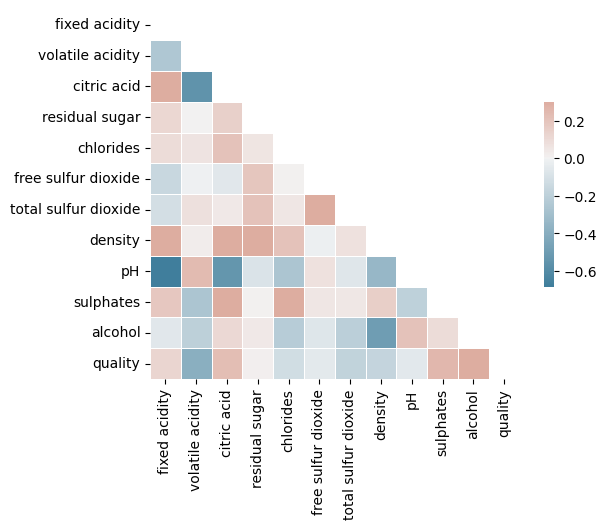

In [ ]:
# Explore the data. First look at correlations.
mask = np.triu(np.ones_like(wine.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(wine.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

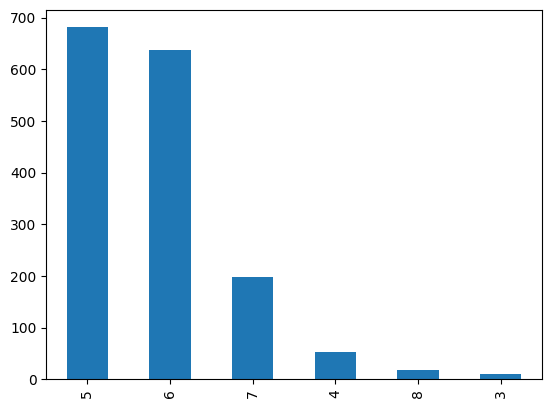

In [ ]:
# Next, let's also look at how many wines there are in each quality level
qualitycounts = wine['quality'].value_counts()
qualitycounts.plot(kind="bar")

We will classify wines as "high quality" if they have a quality score above 6 and as "low quality" otherwise

In [ ]:
wine['quality'] = wine['quality'] > 6
wine['quality'].describe()

count      1599
unique        2
top       False
freq       1382
Name: quality, dtype: object

In [ ]:
from sklearn.tree import DecisionTreeRegressor
wine_tree = DecisionTreeRegressor(min_samples_split=50, min_impurity_decrease=0.0001, random_state=42)


In [ ]:
# Randomly split into training and test sets
np.random.seed(43)
train, test = train_test_split(wine, test_size = 0.3)
Train = train.drop(columns = ['quality']).values
Train_y = train['quality'].values
Test = test.drop(columns = ['quality']).values
Test_y = test['quality'].values

In [ ]:
wine_tree.fit(Train, Train_y)

DecisionTreeRegressor(min_impurity_decrease=0.0001, min_samples_split=50,
                      random_state=42)

In [ ]:
y_train_pred = wine_tree.predict(Train)
y_test_pred = wine_tree.predict(Test)

In [ ]:
threshold = 0.5
y_test_pred_binary = (y_test_pred >= threshold).astype(int)
#Calculate the confusion matrix
confusion = confusion_matrix(Test_y, y_test_pred_binary)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[381  21]
 [ 49  29]]


In [ ]:
29/(29+49) #TPR
0.3717948717948718

0.3717948717948718

In [ ]:
21/(381+21) #FPR
0.05223880597014925

0.05223880597014925

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Test_y, y_test_pred_binary)
print(accuracy)

0.8541666666666666


# PART 2 - ROC Curves

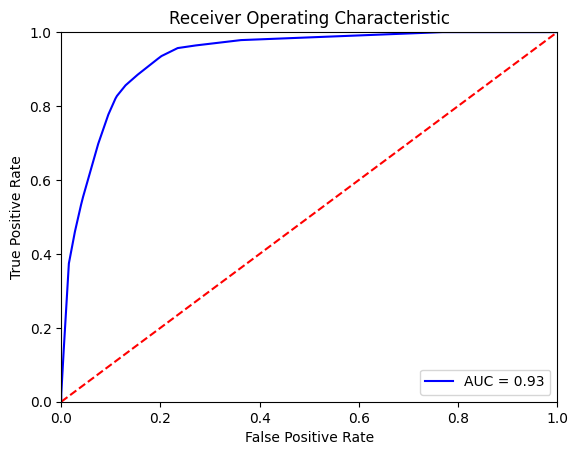

In [ ]:
fpr, tpr, threshold = roc_curve(Train_y, y_train_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

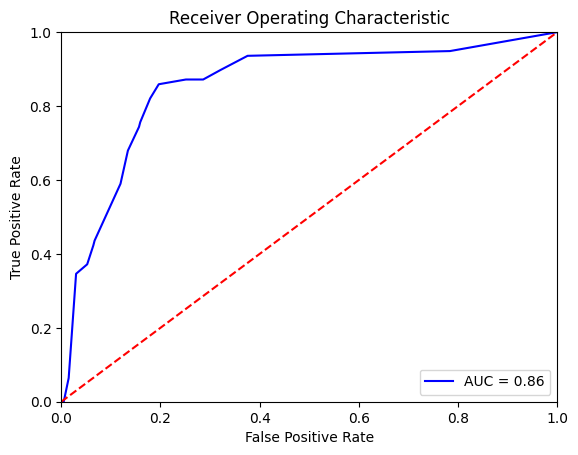

In [ ]:
fpr, tpr, threshold = roc_curve(Test_y, y_test_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# PART 3 - Logistic Regression

In [ ]:
logistic_model = LogisticRegression(fit_intercept=True, max_iter=1000).fit(Train,Train_y)
print(logistic_model.intercept_)
print(logistic_model.coef_)

[-12.2142169]
[[ 0.11369242 -2.17628648  0.23543498  0.10571468 -0.78742682  0.00988878
  -0.01398038 -0.01483354 -0.3561782   2.05754862  0.94916508]]


In [ ]:
np.exp(logistic_model.coef_[0,-1])

2.5835516910276457

(that means p/(1-p) will increase by 150% when we increase alcohol by 1%)

# PART 4 - Training Set Prediction

In [ ]:
logistic_pred_train = logistic_model.predict_proba(Train)
np.sum(logistic_pred_train[:,1] > 0.5)

47

In [ ]:
logistic_pred_train_lab = logistic_pred_train[:,1] > 0.5
confusion_matrix(Train_y, logistic_pred_train_lab)

array([[961,  19],
       [111,  28]])

In [ ]:
28/(28+111) #TPR

0.2014388489208633

In [ ]:
19/(961+19) #FPR

0.019387755102040816

# PART 5 - Test Set Prediction

In [ ]:
logistic_pred_test = logistic_model.predict_proba(Test)
np.sum(logistic_pred_test[:,1] > 0.5)

31

In [ ]:
logistic_pred_test_lab = logistic_pred_test[:,1] > 0.5
confusion_matrix(Test_y, logistic_pred_test_lab)

array([[392,  10],
       [ 57,  21]])

In [ ]:
21/(21+57) #TPR

0.2692307692307692

In [ ]:
10/(392+10) #FPR

0.024875621890547265

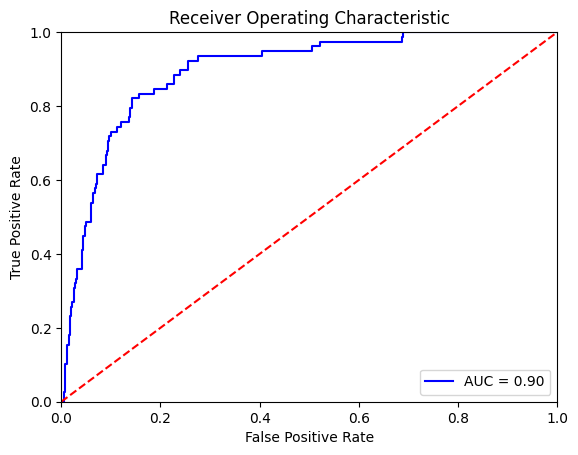

In [ ]:
fpr, tpr, threshold = roc_curve(Test_y, logistic_pred_test[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()